In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("ML.csv")

In [6]:
df.head()

,depth,compressive_strength,tensile_strength,tangential_stress,signal_energy,seismic_event_rate,peak_ground_acceleration,cumulative_seismic_energy,axial_stress,radial_stress,...,rock_type_Granite,rock_type_Limestone,rock_type_Marble,rock_type_Migmatite,rock_type_Phyllite,rock_type_Quartzite,rock_type_Sandstone,rock_type_Shale,rock_type_Slate,intensity_label
0,621,117.8,11.8,88.4,0.48,13.8,0.80,364.0,93.3,78.3,...,False,True,False,False,False,False,False,False,False,II
1,772,114.5,10.1,96.9,0.50,16.0,0.88,376.1,98.3,78.8,...,False,False,False,False,False,False,True,False,False,III
2,775,107.0,8.1,94.4,0.49,17.4,0.88,373.0,105.0,82.1,...,False,False,False,False,False,False,False,True,False,III
3,544,135.5,13.5,78.3,0.33,11.4,0.63,344.1,87.7,70.7,...,False,False,False,False,False,False,False,False,False,I
4,586,130.2,13.9,78.5,0.34,8.2,0.63,331.8,86.7,71.4,...,False,False,False,False,False,False,False,False,False,I


In [7]:
df.isnull().sum()

,0
depth,0
compressive_strength,0
tensile_strength,0
tangential_stress,0
signal_energy,0
seismic_event_rate,0
peak_ground_acceleration,0
cumulative_seismic_energy,0
axial_stress,0
radial_stress,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
y = df['intensity_label']
X = df.drop("intensity_label" , axis=1)

In [10]:
y.head()

,intensity_label
0,II
1,III
2,III
3,I
4,I


In [11]:
X.head()

,depth,compressive_strength,tensile_strength,tangential_stress,signal_energy,seismic_event_rate,peak_ground_acceleration,cumulative_seismic_energy,axial_stress,radial_stress,...,rock_type_Gneiss,rock_type_Granite,rock_type_Limestone,rock_type_Marble,rock_type_Migmatite,rock_type_Phyllite,rock_type_Quartzite,rock_type_Sandstone,rock_type_Shale,rock_type_Slate
0,621,117.8,11.8,88.4,0.48,13.8,0.80,364.0,93.3,78.3,...,False,False,True,False,False,False,False,False,False,False
1,772,114.5,10.1,96.9,0.50,16.0,0.88,376.1,98.3,78.8,...,False,False,False,False,False,False,False,True,False,False
2,775,107.0,8.1,94.4,0.49,17.4,0.88,373.0,105.0,82.1,...,False,False,False,False,False,False,False,False,True,False
3,544,135.5,13.5,78.3,0.33,11.4,0.63,344.1,87.7,70.7,...,False,False,False,False,False,False,False,False,False,False
4,586,130.2,13.9,78.5,0.34,8.2,0.63,331.8,86.7,71.4,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X_train , X_test , y_train , y_test = train_test_split(X , y_encoded ,test_size=0.2)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.5, stratify=y_encoded, random_state=42)

In [15]:
X_train.shape


(1500, 44)

In [16]:
y_train.shape

(1500,)

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
from lightgbm import LGBMClassifier

In [56]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=7, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# LightGBM (optional)
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 44
[LightGBM] [Info] Start training from score -1.375684
[LightGBM] [Info] Start training from score -1.365185
[LightGBM] [Info] Start training from score -1.416067
[LightGBM] [Info] Start training from score -1.388965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMClassifier(random_state=42)

In [57]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

----- Random Forest -----
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       383
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       373

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



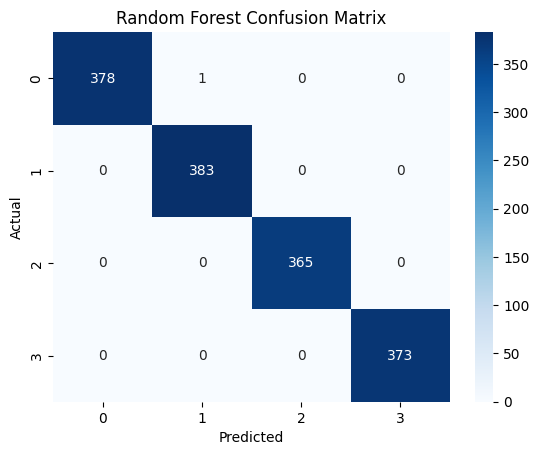

----- XGBoost -----
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       379
           1       1.00      0.99      0.99       383
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       373

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



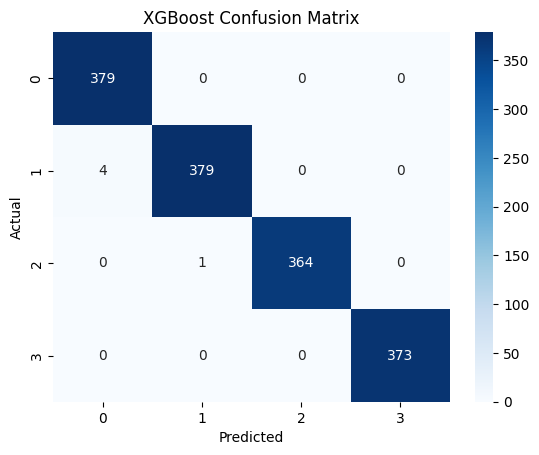

----- Gradient Boosting -----
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       383
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       373

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



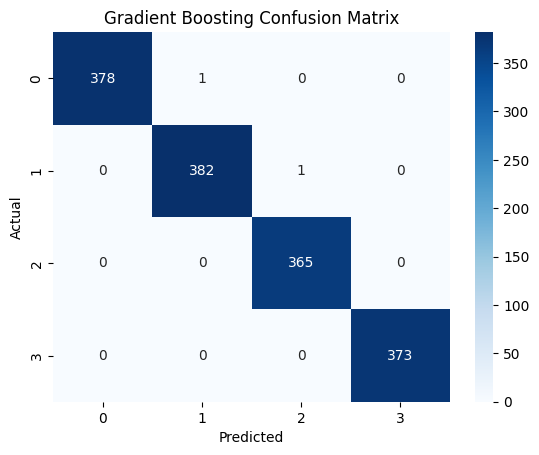

----- LightGBM -----
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       383
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       373

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



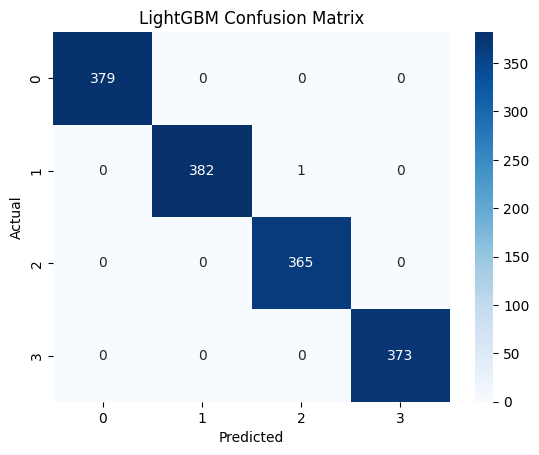

In [58]:
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")
evaluate_model(gb_model, "Gradient Boosting")
evaluate_model(lgbm_model, "LightGBM")  # if using

In [59]:
y_pred1 = rf_model.predict(X_test)
y_pred2 = xgb_model.predict(X_test)
y_pred3 = gb_model.predict(X_test)
y_pred4 = lgbm_model.predict(X_test)

In [60]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RandomForest': y_pred1,
    'XGBoost': y_pred2,
    'GradientBoost': y_pred3,
    'LightGBM': y_pred4
})

# View the first 20 predictions
print(comparison_df.head(20))

    Actual  RandomForest  XGBoost  GradientBoost  LightGBM
0        0             0        0              0         0
1        0             0        0              0         0
2        0             0        0              0         0
3        1             1        1              1         1
4        3             3        3              3         3
5        3             3        3              3         3
6        1             1        1              1         1
7        3             3        3              3         3
8        1             1        1              1         1
9        0             0        0              0         0
10       2             2        2              2         2
11       2             2        2              2         2
12       3             3        3              3         3
13       2             2        2              2         2
14       0             0        0              0         0
15       1             1        1              1        

In [61]:
print("RandomForest Correct:", (y_pred1 == y_test).sum(), "/", len(y_test))
print("XGBoost Correct:", (y_pred2 == y_test).sum(), "/", len(y_test))
print("GradientBoost Correct:", (y_pred3 == y_test).sum(), "/", len(y_test))
print("LightGBM Correct:", (y_pred4 == y_test).sum(), "/", len(y_test))

RandomForest Correct: 1499 / 1500
XGBoost Correct: 1495 / 1500
GradientBoost Correct: 1498 / 1500
LightGBM Correct: 1499 / 1500


In [62]:
print(rf_model.score(X_test , y_test))
print(xgb_model.score(X_test , y_test))
print(gb_model.score(X_test , y_test))
print(lgbm_model.score(X_test , y_test))

0.9993333333333333
0.9966666666666667
0.9986666666666667
0.9993333333333333


In [63]:
from sklearn.metrics import confusion_matrix

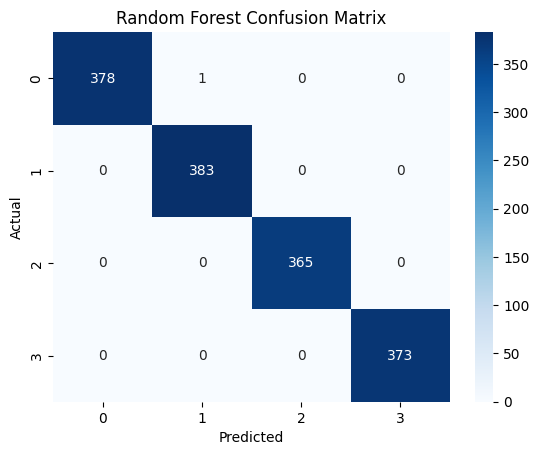

In [64]:
cm = confusion_matrix(y_test , y_pred1)
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

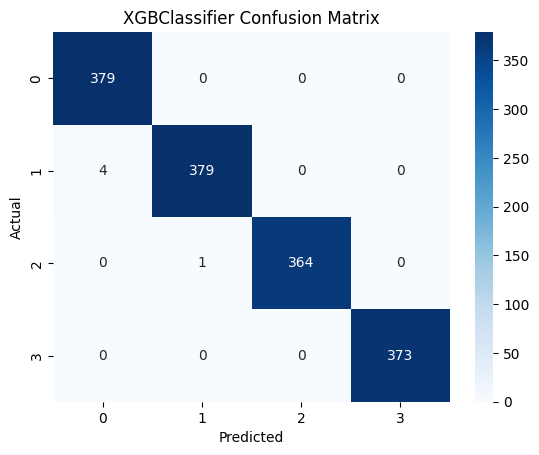

In [65]:
cm = confusion_matrix(y_test , y_pred2)
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues")
plt.title("XGBClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

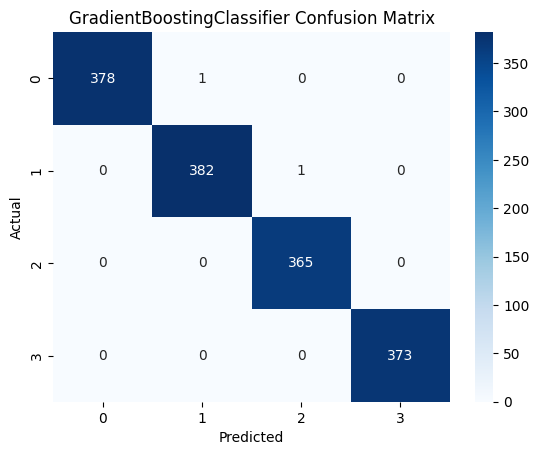

In [66]:
cm = confusion_matrix(y_test , y_pred3)
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues")
plt.title("GradientBoostingClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

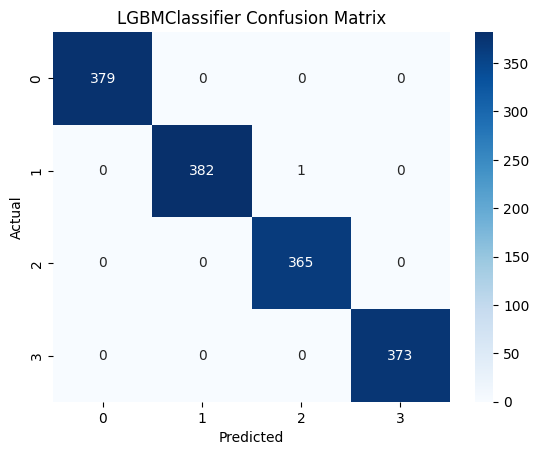

In [67]:
cm = confusion_matrix(y_test , y_pred4)
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues")
plt.title("LGBMClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

In [52]:
lr.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [53]:
y_pred5 = lr.predict(X_test)

In [54]:
lr.score(X_test , y_test)

1.0

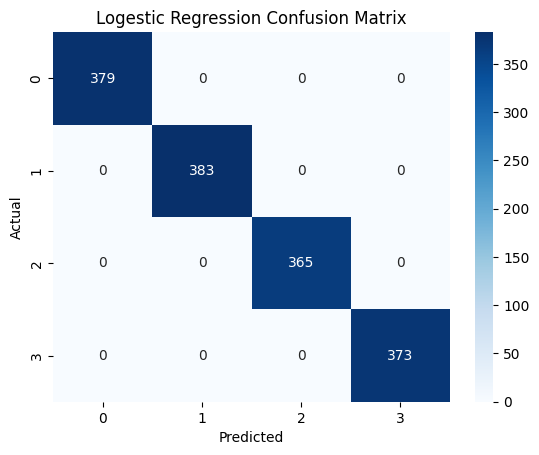

In [55]:
cm = confusion_matrix(y_test , y_pred5)
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues")
plt.title("Logestic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Now by all these experements we will get XGBoost Classifier because of its 99% accuracy

In [37]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(gb_model, "gb_model.pkl")
joblib.dump(lgbm_model, "lgbm_model.pkl")
joblib.dump(lr, "lr_model.pkl")
joblib.dump(le, "label_encoder.pkl")

# Also save X_test and y_test
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)